# Explore here

In [185]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Preprocessing --------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [186]:
df_raw = pd.read_csv("../bank-marketing-campaign-data.csv", sep=";")

In [187]:
df_raw.to_csv("../data/raw/RawData")
df_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [188]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [189]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24175,46,management,married,university.degree,no,no,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
38377,55,entrepreneur,married,professional.course,no,yes,no,telephone,oct,mon,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
1243,32,blue-collar,married,basic.6y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
6564,39,admin.,married,professional.course,no,yes,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7639,32,services,single,high.school,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
19589,45,blue-collar,married,basic.9y,no,yes,no,cellular,aug,thu,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
13294,24,services,single,high.school,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
33427,49,retired,married,basic.4y,unknown,yes,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
39689,33,admin.,married,university.degree,no,no,no,cellular,may,mon,...,2,15,3,failure,-1.8,93.876,-40.0,0.685,5008.7,no
35602,45,admin.,divorced,university.degree,no,no,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no


In [190]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [191]:
df_processed = df_raw.copy()

In [192]:
df_processed =  df_processed.dropna()



In [193]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

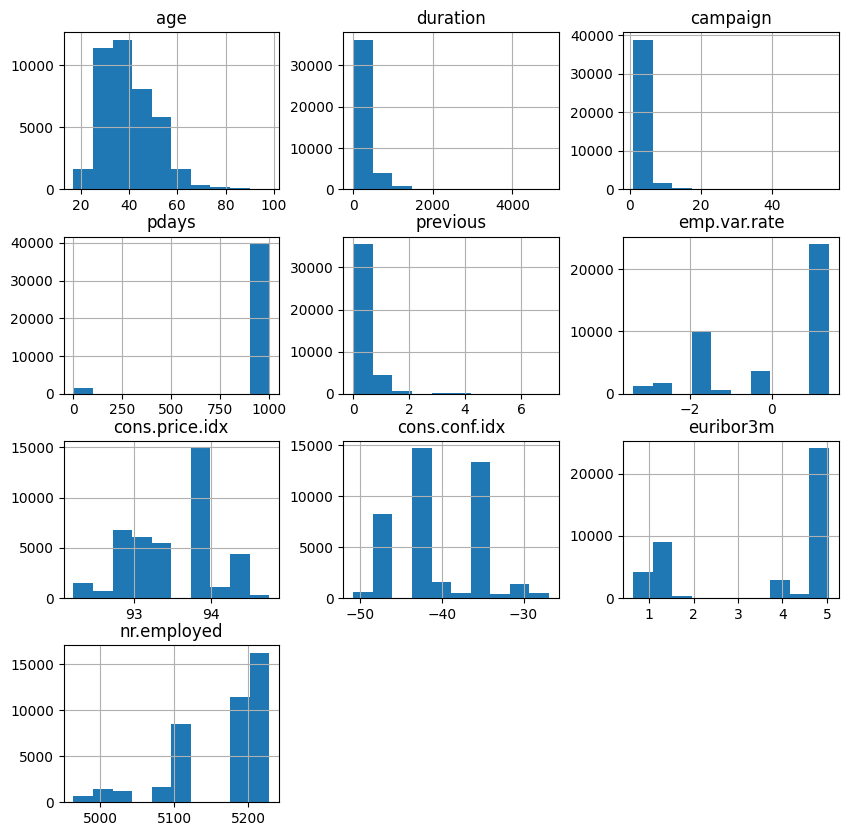

In [194]:
df_processed.hist(figsize=(10,10))
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


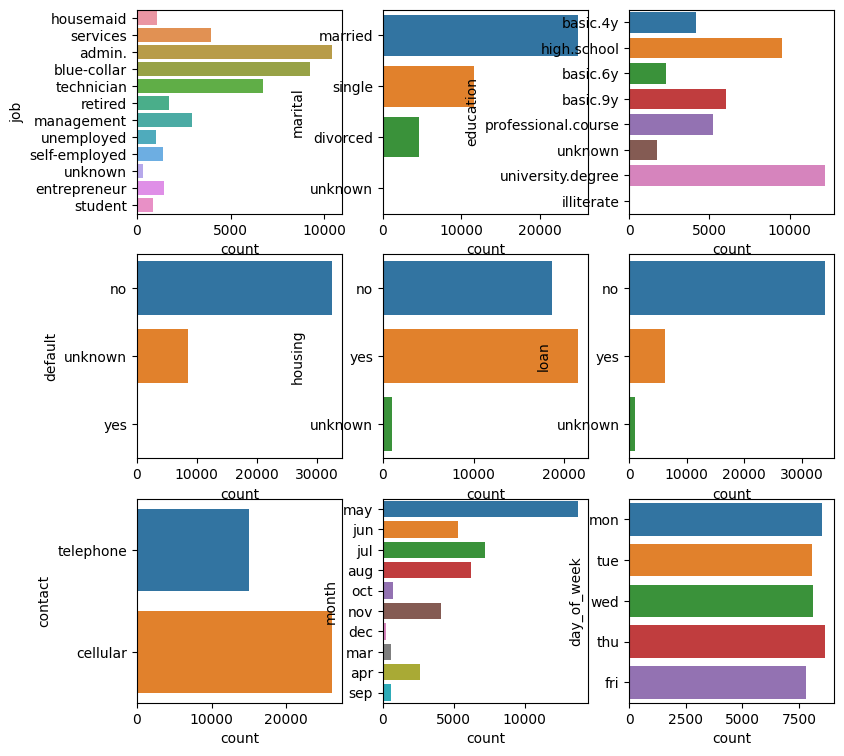

In [195]:
cats = df_processed.select_dtypes('object')
fig,ax = plt.subplots(3,3,figsize=(9,9))
axs = ax.flatten() 
for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax=axs[i])
plt.show()

In [196]:
df_processed = df_processed.drop(columns=['default', 'day_of_week', 'pdays', 'nr.employed', 'month', 'duration', 'previous', 'poutcome'])
df = df_processed[df_processed['housing'] != 'unknown']
df = df_processed[df_processed['loan'] != 'unknown']

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


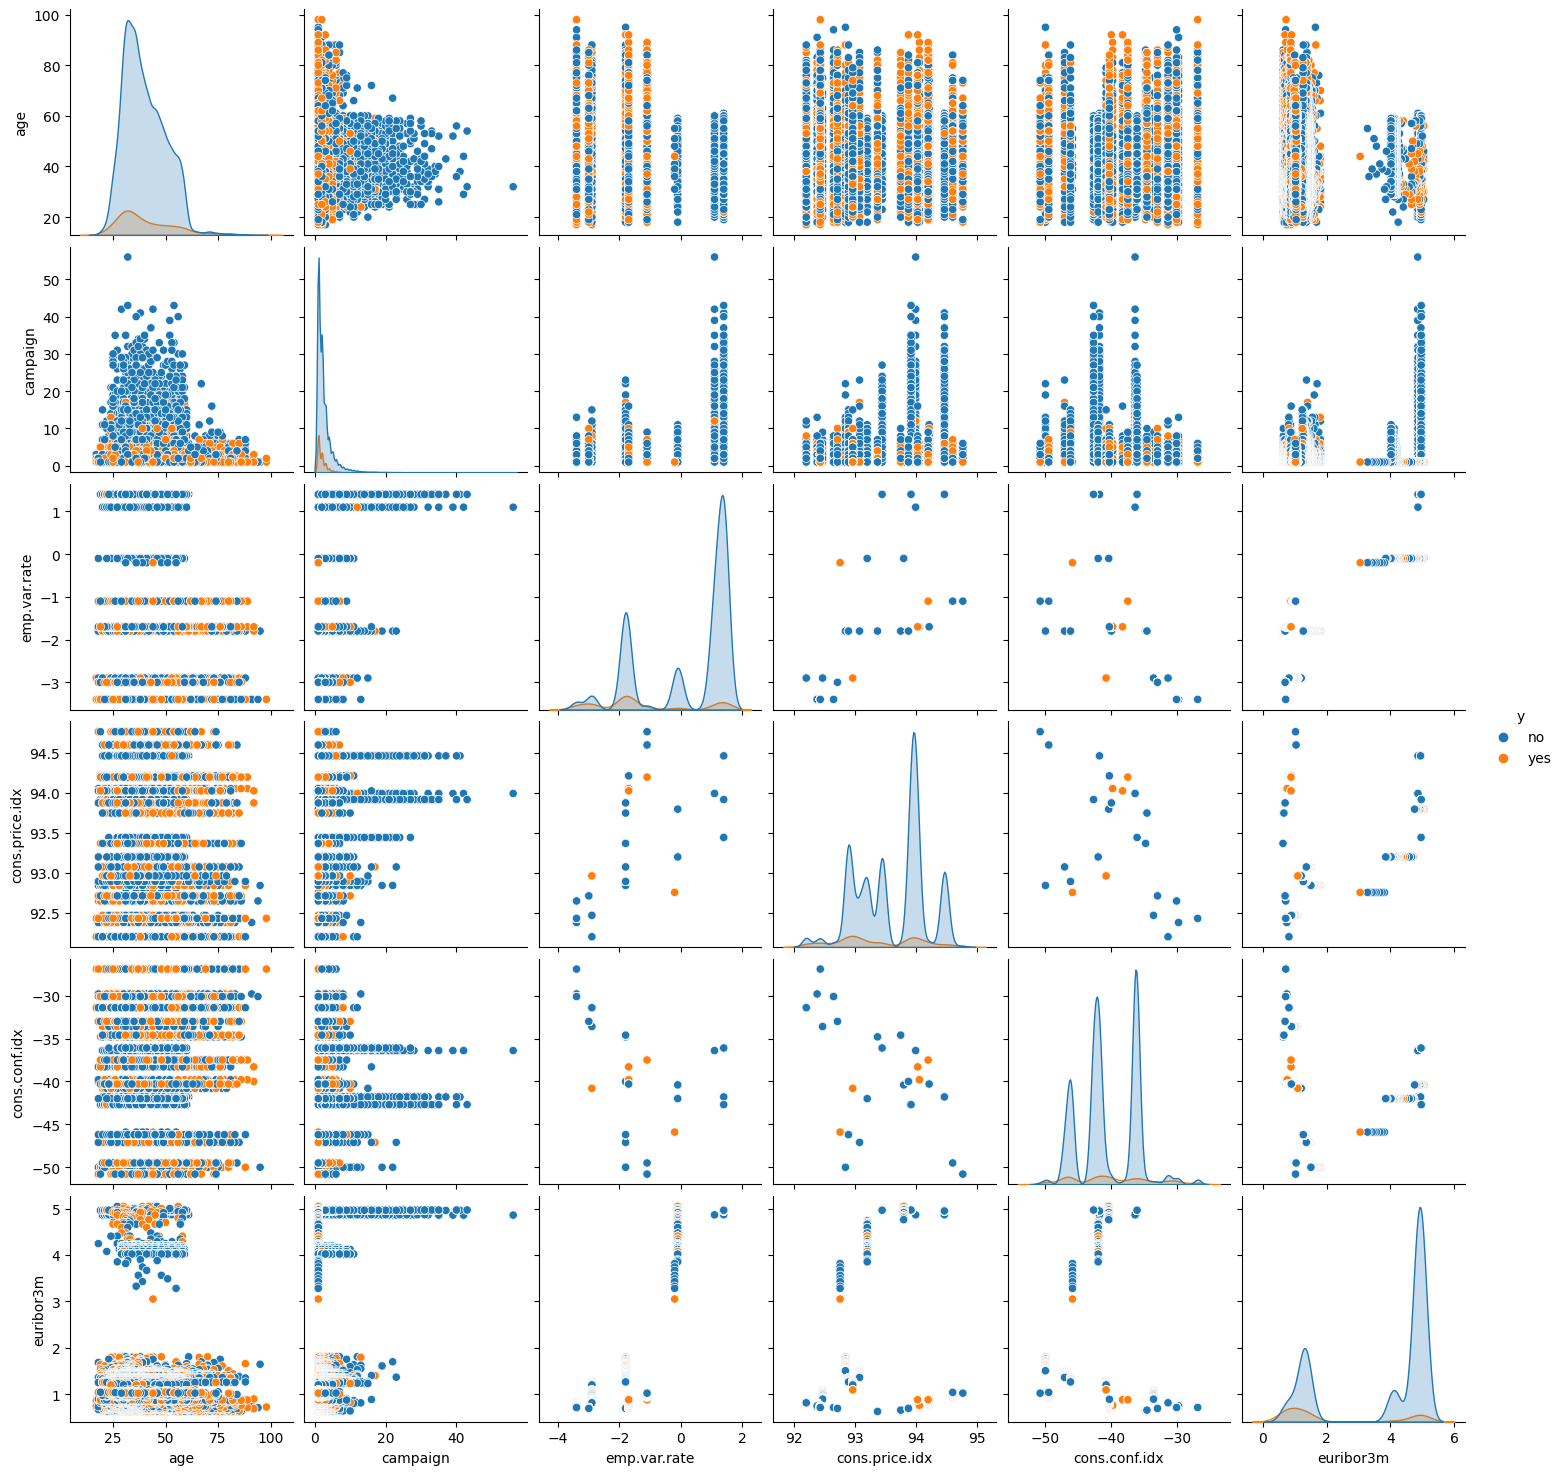

In [197]:
sns.pairplot(data=df_processed, hue='y')

In [198]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   campaign        41188 non-null  int64  
 8   emp.var.rate    41188 non-null  float64
 9   cons.price.idx  41188 non-null  float64
 10  cons.conf.idx   41188 non-null  float64
 11  euribor3m       41188 non-null  float64
 12  y               41188 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 4.1+ MB


In [199]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


In [200]:
df_processed.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,0.004594,-0.000371,0.000857,0.129372,0.010767
campaign,0.004594,1.000000,0.150754,0.127836,-0.013733,0.135133
emp.var.rate,-0.000371,0.150754,1.000000,0.775334,0.196041,0.972245
cons.price.idx,0.000857,0.127836,0.775334,1.000000,0.058986,0.688230
cons.conf.idx,0.129372,-0.013733,0.196041,0.058986,1.000000,0.277686
euribor3m,0.010767,0.135133,0.972245,0.688230,0.277686,1.000000


In [201]:
df_processed = df_processed.drop(columns=['emp.var.rate'])

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


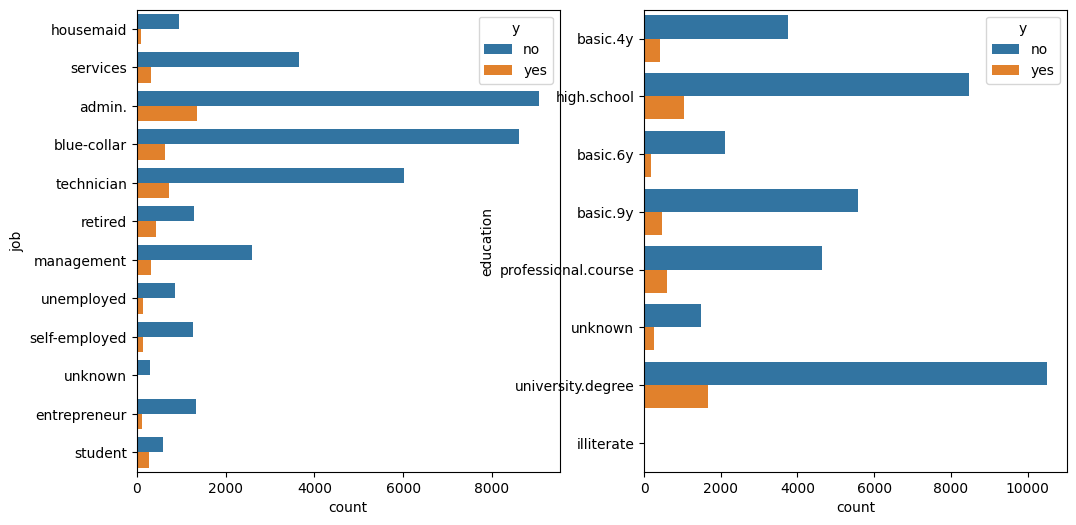

In [202]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=df_processed, y='job', hue='y', ax=ax[0])
sns.countplot(data=df_processed, y='education', hue='y', ax=ax[1])
plt.show()

In [203]:
df_processed['job'] = pd.Categorical(df_processed['job'])
df_processed['marital'] = pd.Categorical(df_processed['marital'])
df_processed['education'] = pd.Categorical(df_processed['education'])
df_processed['housing'] = pd.Categorical(df_processed['housing'])
df_processed['loan'] = pd.Categorical(df_processed['loan'])
df_processed['contact'] = pd.Categorical(df_processed['contact'])
df_processed['y'] = pd.Categorical(df_processed['y'])

In [204]:
X = df_processed.drop(columns=['y'])
y = df_processed['y']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1948, test_size=0.2)

In [206]:
# Model training and prediction
cat_cols = X_train.select_dtypes('category').columns
num_cols = X_train.select_dtypes('number').columns

# Create pipeline
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [207]:
logisticre = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', C= 10, solver='sag', class_weight='balanced'))
])
logisticre.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['job', 'marital', 'education', 'housing', 'loan', 'contact'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='sag'))])

              precision    recall  f1-score   support

          no       0.95      0.76      0.84      7321
         yes       0.26      0.67      0.37       917

    accuracy                           0.75      8238
   macro avg       0.60      0.71      0.61      8238
weighted avg       0.87      0.75      0.79      8238



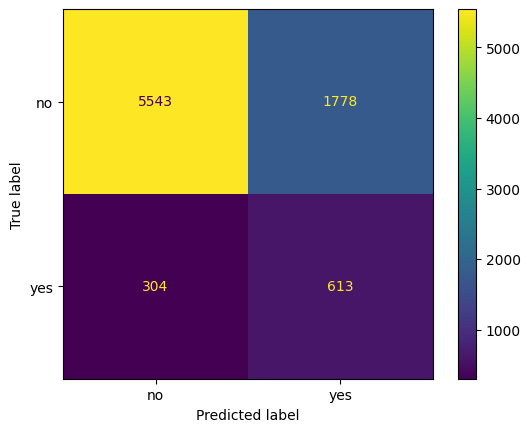

In [231]:
y_hat = logisticre.predict(X_test)
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=logisticre.classes_).plot()
plt.show()

In [230]:
X_train_pipe = preprocessor.transform(X_train)
X_train_pipe

array([[ 1.        ,  0.        ,  0.        , ..., -1.05536346,
        -0.06325672, -1.35242259],
       [ 0.        ,  0.        ,  0.        , ..., -1.17616216,
        -1.23019833, -1.33802562],
       [ 0.        ,  0.        ,  0.        , ..., -1.5972319 ,
         2.24901646, -1.66915587],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.59267591,
        -0.47384729,  0.77372155],
       [ 1.        ,  0.        ,  0.        , ..., -1.97343356,
         2.94053742, -1.65533478],
       [ 0.        ,  0.        ,  0.        , ...,  0.59267591,
        -0.47384729,  0.7748733 ]])

In [232]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [233]:
grid.fit(X_train_pipe, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: U

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [236]:
logisticre = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', C= 0.1, solver='liblinear'))
])
logisticre.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['job', 'marital', 'education', 'housing', 'loan', 'contact'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7321
         yes       0.55      0.17      0.26       917

    accuracy                           0.89      8238
   macro avg       0.73      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238



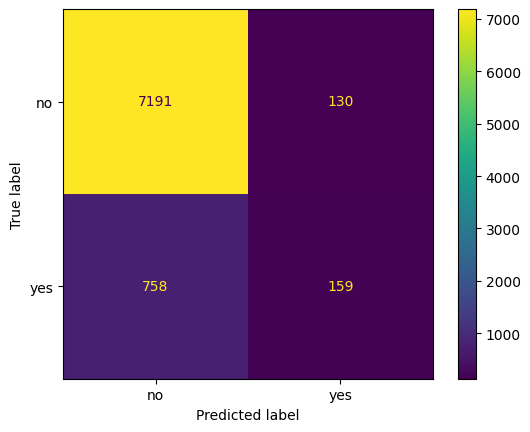

In [237]:
y_hat = logisticre.predict(X_test)
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=logisticre.classes_).plot()
plt.show()